In [9]:
# Page 111/264

import numpy as np
import seaborn as sns
import brfss
import thinkstats2
import thinkplot

In [10]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

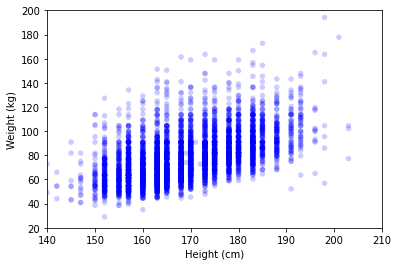

<Figure size 576x432 with 0 Axes>

In [11]:
thinkplot.Scatter(heights, weights)
thinkplot.Show(xlabel='Height (cm)',
ylabel='Weight (kg)',
axis=[140, 210, 20, 200])

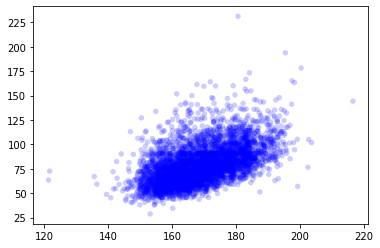

In [12]:
# Jittering
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)
thinkplot.Scatter(heights, weights, alpha=0.2)

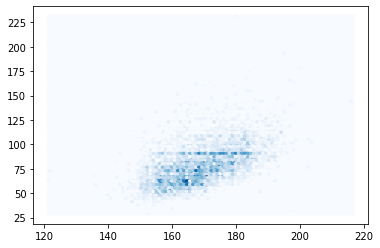

In [13]:
thinkplot.HexBin(heights, weights)

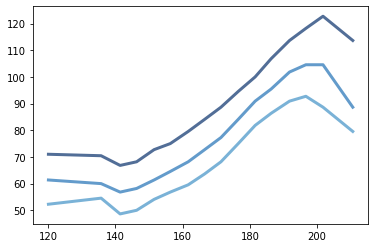

In [24]:
# Characterizing relationships
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

# For each group we can compute the mean height and the CDF of weight
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

# we can plot percentiles of weight versus height:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)